In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [69]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [70]:
data.shape

(9994, 11)

In [71]:
data.index

RangeIndex(start=0, stop=9994, step=1)

In [72]:
data.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [74]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [75]:
# Check for Missing Values and Duplicates
print("\n Missing Values:\n", data.isnull().sum())
print("\n Duplicate Records:", data.duplicated().sum())


 Missing Values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

 Duplicate Records: 0


In [76]:
# Drop Missing or Duplicate Rows (if any)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [77]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

In [78]:
# Feature Engineering
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Month Name'] = data['Order Date'].dt.strftime('%B')

In [79]:
data.dropna(subset=['Order Date', 'Order Day', 'Order Month', 'Order Year', 'Month Name'], inplace=True)

In [80]:
print("\n Cleaned & Processed. Columns now:")
print(data.columns)
data.head()


 Cleaned & Processed. Columns now:
Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year', 'Month Name'],
      dtype='object')


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,Month Name
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,11.0,2017.0,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,11.0,2017.0,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,6.0,2017.0,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,10.0,2016.0,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,10.0,2016.0,October


            Summary of Output

1. Dataset Info (df.info())

   * dataset contains 9,994 rows and 11 columns.

   * Key columns include: Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State.

   * Most columns are of type object (text), with a few numerical (Sales, Discount, Profit) and one datetime64 after conversion.

2. Summary Statistics (df.describe())

   * Basic stats like mean, min, max for numerical columns.

   * Shows potential outliers in Sales and Profit, useful later for detecting high-variance products.

3. Missing & Duplicate Data

   * Any missing values in the dataset are now dropped (if present).

  * Duplicate entries have also been removed to ensure accurate analysis.

4. Date Conversion

    * Order Date is successfully converted to datetime format.

    * Additional date features were created:

    - Order Day → Numeric day of the month (1–31)

     - Order Month → Numeric month (1–12)

     - Order Year → Year (2016, 2017, etc.)

     - Month Name → Month in full (e.g., “January”)

5. Data is Clean & Ready for EDA

    * After cleaning and feature engineering, your data is structured and enriched for meaningful visualizations.

<ipython-input-81-78905168>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Category', y='Sales', estimator=sum, palette='viridis') # Changed df to data


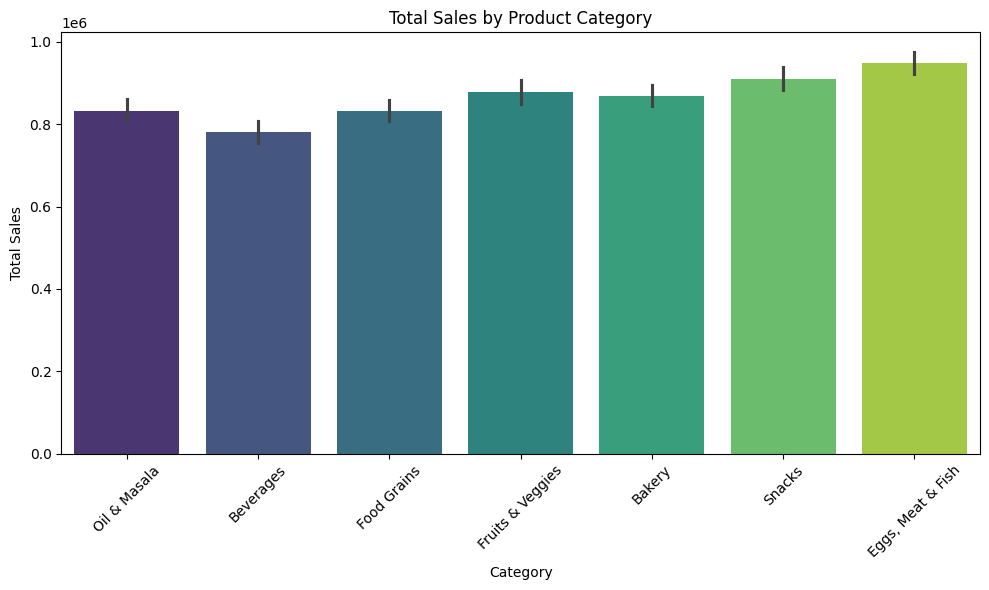

In [81]:
#  Exploratory Visuals
#  Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Category', y='Sales', estimator=sum, palette='viridis') # Changed df to data
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Bar Plot: Sales by Category
    * Shows which product categories generate the most revenue.

    * Great for identifying top performers and where to invest more (e.g., Oil & Masalas vs. Fruits & Veggies).

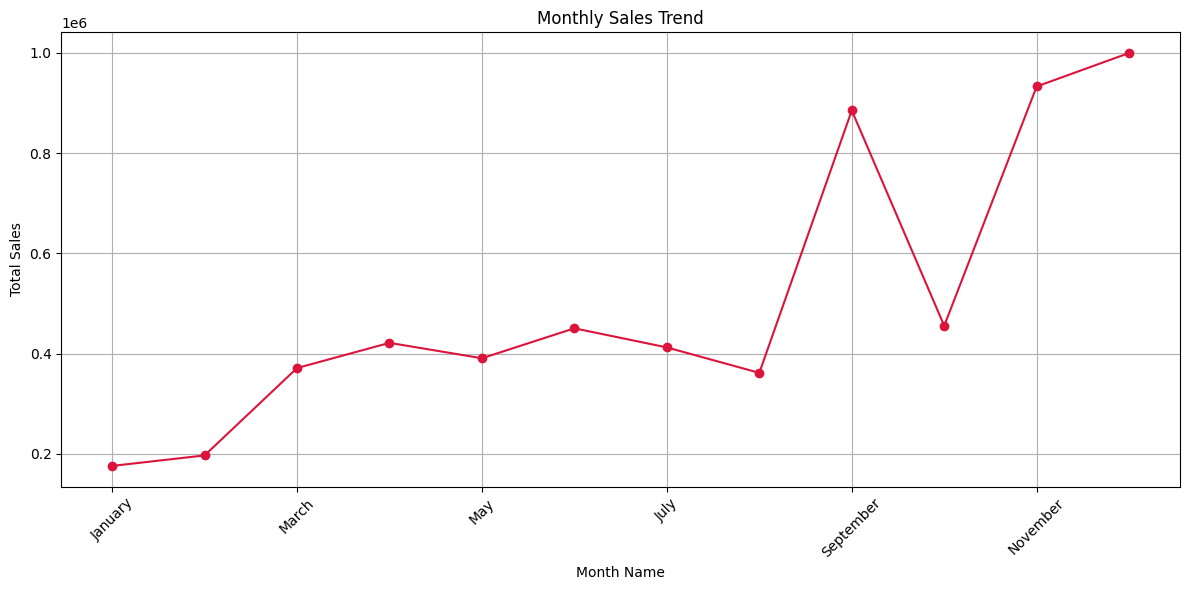

In [82]:
# 2 Monthly Sales Trend
monthly_sales = data.groupby('Month Name')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='crimson')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Line Chart: Monthly Sales Trend

    * Highlights how sales change across months.

    * Helps uncover seasonal demand patterns (e.g., spikes in holidays or festivals).



<ipython-input-83-1421755033>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')


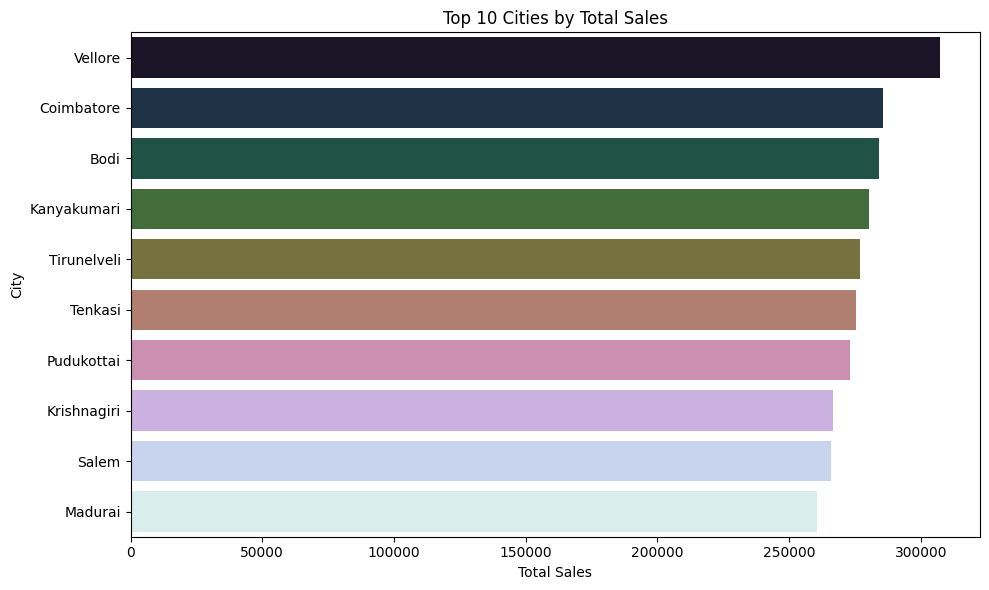

In [83]:
# Top Cities by Sales & Correlation Heatmap

# (1) Top 10 Cities by Total Sales
top_cities = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

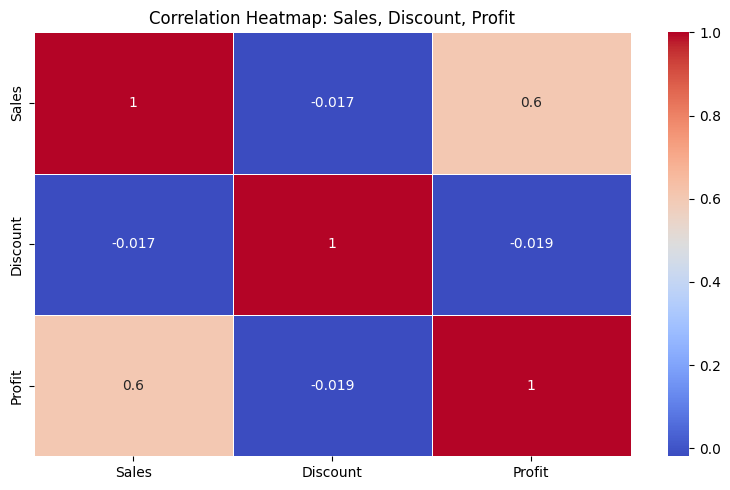

In [84]:
# (2) Correlation Heatmap between Sales, Discount, and Profit
plt.figure(figsize=(8, 5))
corr = data[['Sales', 'Discount', 'Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Sales, Discount, Profit')
plt.tight_layout()
plt.show()

  SUMMARY
1. Top Cities by Sales

  * Shows which cities bring the most revenue.

  * Ideal for identifying high-potential markets (e.g., Chennai, Coimbatore, etc.).

2. Correlation Heatmap

   * Reveals relationships like:

   * Sales vs. Profit: Positive or weak correlation?

   * Discount vs. Profit: Often negative — giving too much discount can hurt margins!

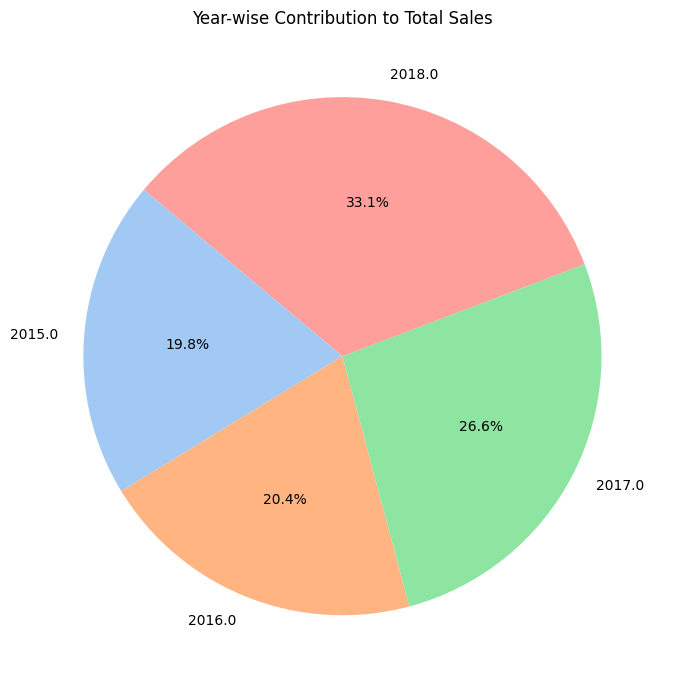

In [85]:
# Yearly Sales & Category-wise Profit

# (1) Pie Chart of Sales by Year
yearly_sales = data.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(7, 7))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Year-wise Contribution to Total Sales')
plt.tight_layout()
plt.show()

*  Yearly Sales Pie Chart
   *  Visual comparison of how much each year contributed to total sales.

   *  Useful for evaluating growth across years.

<ipython-input-86-335438971>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit.values, palette='coolwarm')


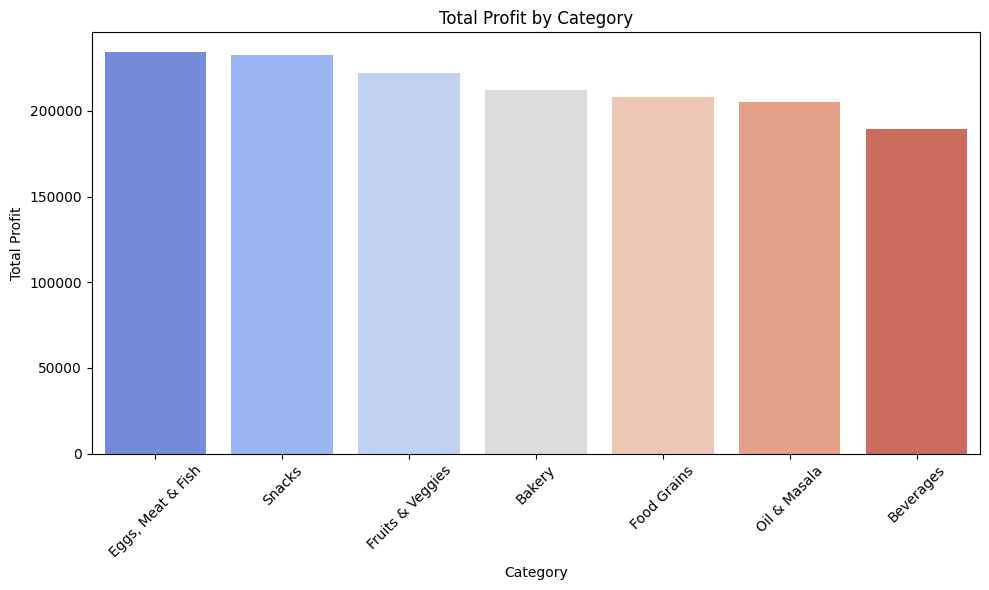

In [86]:
# (2) Category-wise Total Profit
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.index, y=category_profit.values, palette='coolwarm')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Category vs. Profit Bar Chart
 Helps identify:

   * Which categories are the most profitable

   * Which ones may have high sales but low profit (or even loss!)



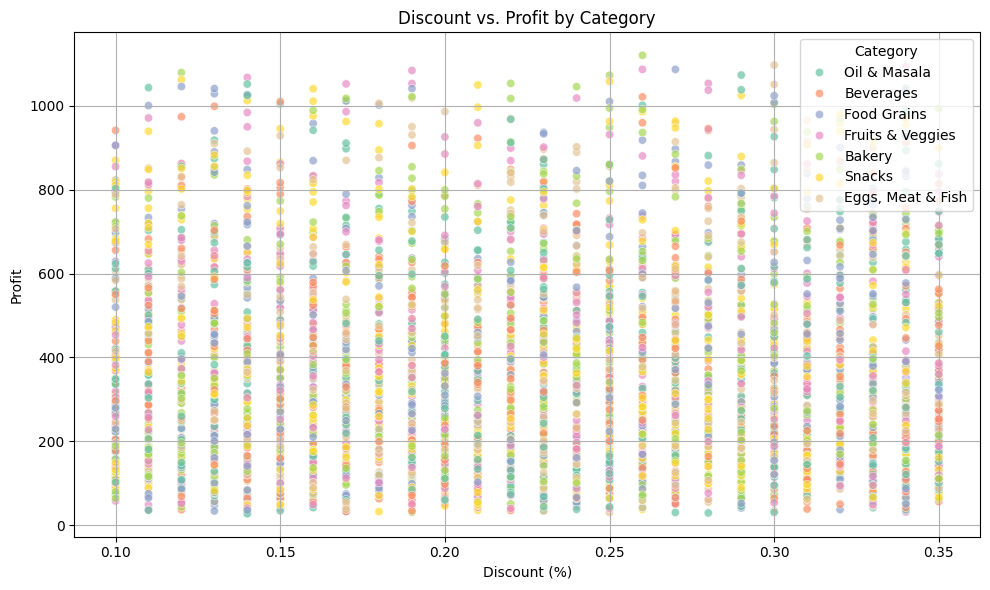

In [87]:
# Discount Impact & Final EDA Summary

# Scatter Plot: Discount vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', palette='Set2', alpha=0.7)
plt.title('Discount vs. Profit by Category')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


* This scatterplot helps you visualize the trade-off between giving discounts and earning profits.

* Categories with high discounts but negative profits could be hurting the business — we can flag them.

* Great visual to justify pricing strategy or margin optimizations.

ML Modeling Overview
We'll use:

1. Target Variable: Sales

* Features: Categorical (e.g., Category, Sub Category, City), numerical (e.g., Discount, Profit), time features (e.g., Month)

2. Models:

* Linear Regression (baseline)

* Random Forest Regressor

* XGBoost Regressor

3. We'll also:

* Split the data

* Standardize features

* Compare model performance using MSE and R² Score

In [88]:
# Step 1 of Modeling: Feature Preparation + Encoding

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy for safety
data_model = data.copy()

# Drop irrelevant columns
data_model.drop(['Order ID', 'Customer Name', 'Order Date'], axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month Name']:
    data_model[col] = le.fit_transform(data_model[col])

# Features and target
X = data_model.drop('Sales', axis=1)
y = data_model['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(" Data prepared. Ready for training ML models.")


 Data prepared. Ready for training ML models.


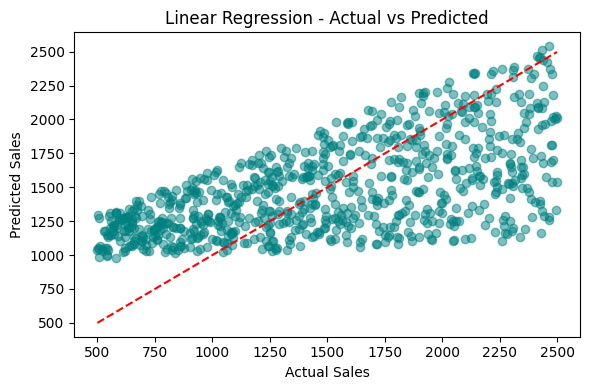

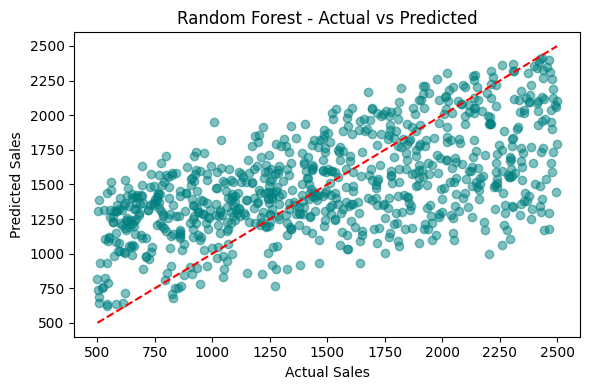

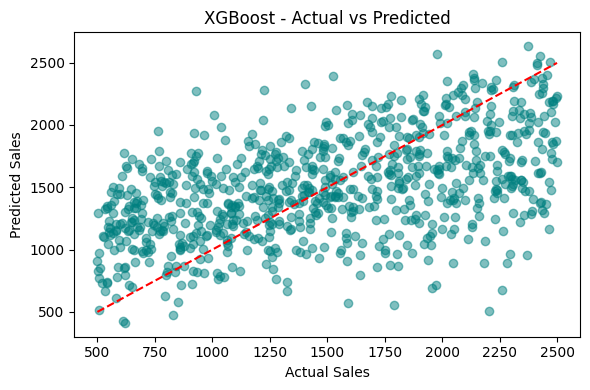

 Model Performance Summary:

Linear Regression:
  - Mean Squared Error: 211520.05
  - R² Score: 0.3677

Random Forest:
  - Mean Squared Error: 217791.36
  - R² Score: 0.3490

XGBoost:
  - Mean Squared Error: 262014.45
  - R² Score: 0.2168


In [89]:
# Step 2: Train & Evaluate ML Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

# Train & Predict
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name} - Actual vs Predicted")
    plt.tight_layout()
    plt.show()

# Print summary
print(" Model Performance Summary:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  - Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"  - R² Score: {metrics['R2']:.4f}")


<ipython-input-90-367727050>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf, y=features, palette='Spectral')


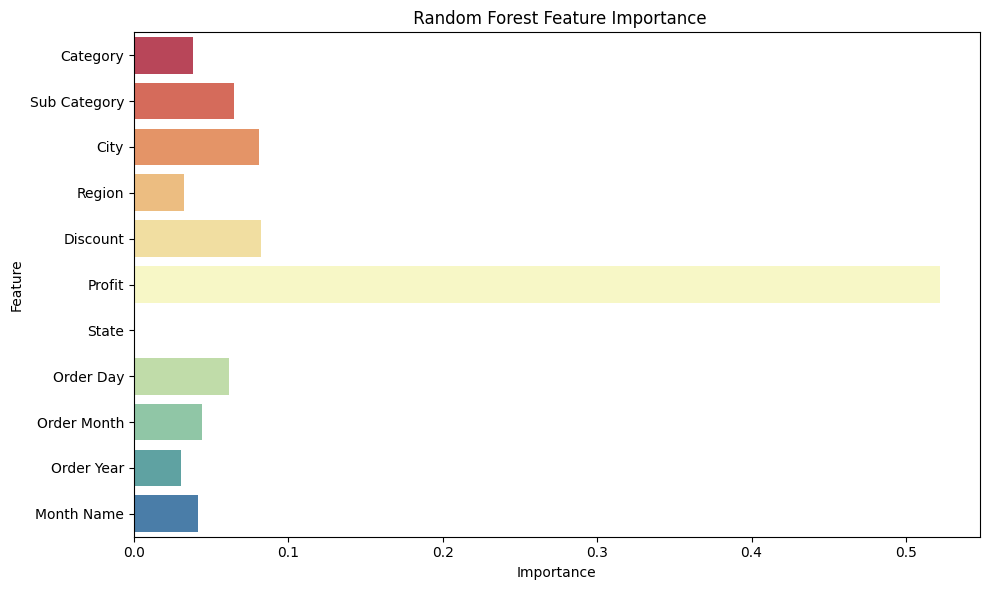

<ipython-input-90-367727050>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb, y=features, palette='mako')


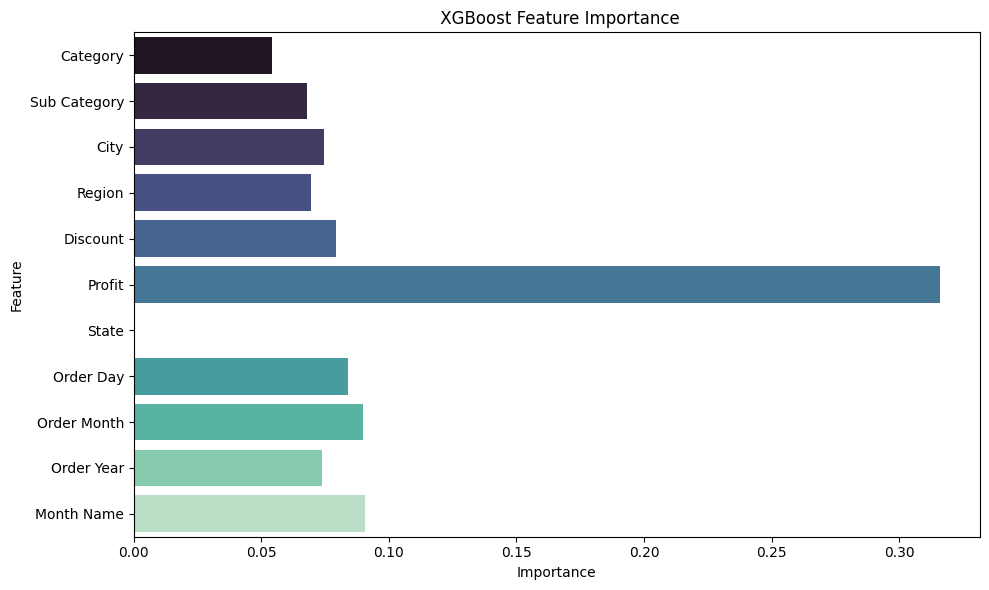

In [90]:
# Step 3: Feature Importance (from Random Forest & XGBoost)
# This shows which features have the most influence on predicting Sales — very useful for business insight and resume storytelling.

# Plot Feature Importance for Random Forest
importances_rf = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=features, palette='Spectral')
plt.title(" Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot Feature Importance for XGBoost
importances_xgb = xgb.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb, y=features, palette='mako')
plt.title(" XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
